<a href="https://colab.research.google.com/github/awarbler/CSE450AWF23/blob/main/M04T01MasterBikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Links




bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

## Data Dictionary


- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp_c : temperature in Celsius.
- feels_like_c: "Feels like" temperature in Celsius.
- hum: humidity percentage
- windspeed: Wind speed.
- casual: count of casual users
- registered: count of registered users

# Import libraries and datasets

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')


# Build -> Compile -> Model -> Fit -> Predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


# Data Exploration | Visuals

In [ ]:
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [ ]:
bikes.head(3)

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27


In [ ]:

bikes = bikes.drop('dteday', axis =1)
print(bikes.columns)
bikes = bikes.apply(pd.to_numeric)

Index(['season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum',
       'windspeed', 'temp_c', 'feels_like_c', 'casual', 'registered'],
      dtype='object')


# Model Attempts

# Amanda

In [ ]:
#regression with multiple inputs using the tensor flow example
bikes = bikes.apply(pd.to_numeric)
#splitting data
train_dataset = bikes.sample(frac=0.8, random_state=0)
test_dataset = bikes.drop(train_dataset.index)


In [ ]:
#inspect
sns.pairplot(train_dataset[['dteday','season', 'hr', 'holiday', 'workingday', 'weathersit','hum','windspeed', 'temp_c', 'feels_like_c','casual','registered']], diag_kind='kde')

KeyError: ignored

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,13310.0,2.483471,1.085768,1.00,2.0000,2.00,3.0000,4.0000
hr,13310.0,11.529076,6.907057,0.00,6.0000,12.00,18.0000,23.0000
holiday,13310.0,0.028625,0.166757,0.00,0.0000,0.00,0.0000,1.0000
workingday,13310.0,0.685575,0.464304,0.00,0.0000,1.00,1.0000,1.0000
weathersit,13310.0,1.422615,0.643070,1.00,1.0000,1.00,2.0000,4.0000
hum,13310.0,0.626212,0.193198,0.00,0.4700,0.63,0.7800,1.0000
windspeed,13310.0,12.738317,8.179928,0.00,7.0000,13.00,17.0000,57.0000
temp_c,13310.0,15.706998,9.031127,-7.06,7.9800,16.44,23.0200,38.0600
feels_like_c,13310.0,15.831020,11.309288,-16.00,5.9978,17.00,24.9992,48.9968
casual,13310.0,36.334711,50.088985,0.00,4.0000,17.00,49.0000,367.0000


In [ ]:
#splitting features

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('registered')
test_labels = test_features.pop('registered')


In [ ]:
#normalizing the data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[2.4834721e+00 1.1529082e+01 2.8625097e-02 6.8557519e-01 1.4226149e+00
  6.2621146e-01 1.2738318e+01 1.5707002e+01 1.5831020e+01 3.6334747e+01]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 3.    0.    0.    1.    1.    1.    0.   17.38 18.    7.  ]]

Normalized: [[ 0.48 -1.67 -0.17  0.68 -0.66  1.93 -1.56  0.19  0.19 -0.59]]


# Anita

## Model Attempt 1

In [ ]:
# load libraries

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

# Commonly used modules
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers

# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Import data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.head()
bikes.describe()
bikes.info()
#no missig data or empty fields

print(bikes.shape)
print(bikes.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB
(16637, 12)
Index(['dteday', 'season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum',
       'windspeed', 'temp_c', 'feels_like_c', 'casual', 'registered'],
      dtype='object')


0
       dteday  season     hr  holiday  workingday  weathersit    hum  \
0       False   False  False    False       False       False  False   
1       False   False  False    False       False       False  False   
2       False   False  False    False       False       False  False   
3       False   False  False    False       False       False  False   
4       False   False  False    False       False       False  False   
...       ...     ...    ...      ...         ...         ...    ...   
16632   False   False  False    False       False       False  False   
16633   False   False  False    False       False       False  False   
16634   False   False  False    False       False       False  False   
16635   False   False  False    False       False       False  False   
16636   False   False  False    False       False       False  False   

       windspeed  temp_c  feels_like_c  casual  registered  
0          False   False         False   False       False  
1          

<ipython-input-8-0f8751545a7a>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()
<ipython-input-8-0f8751545a7a>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()
<ipython-input-8-0f8751545a7a>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5632      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 55169 (215.50 KB)
Trainable params: 55169 (215.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
163/1

0.8136729148011435

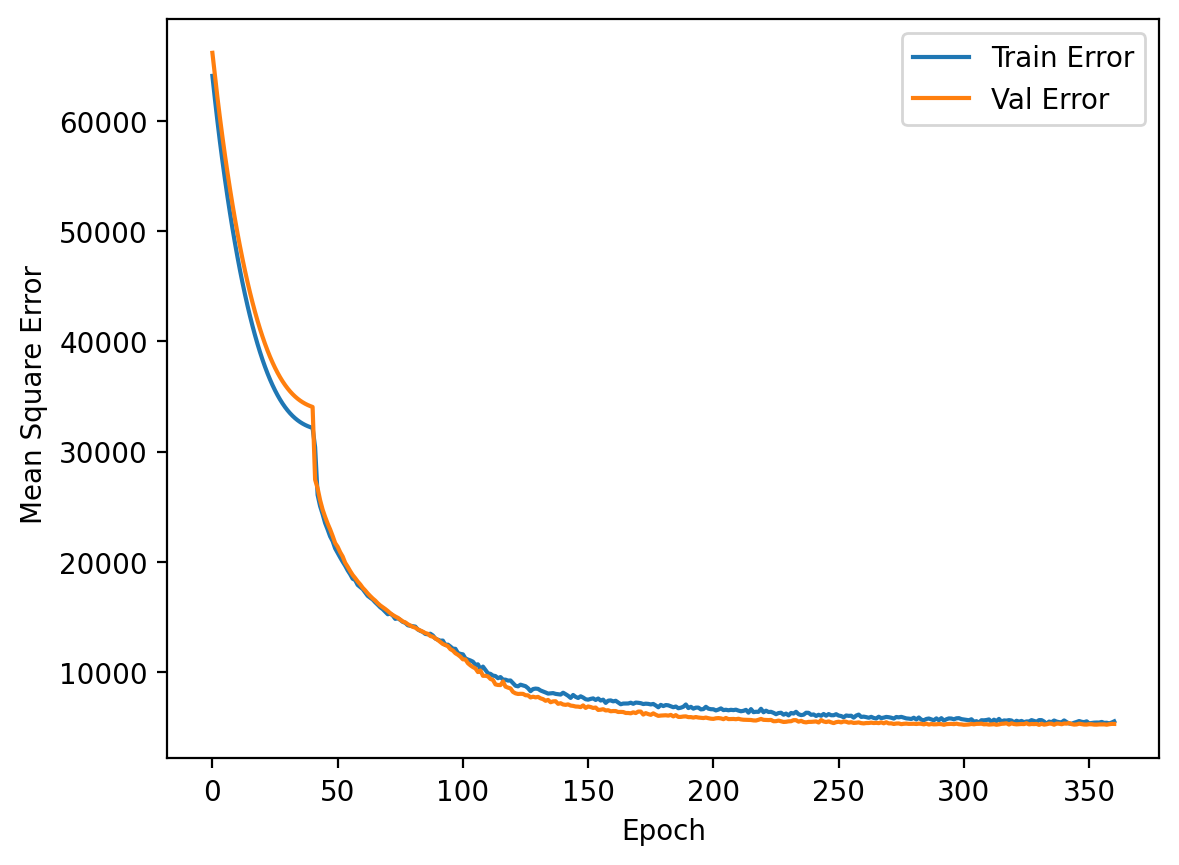

In [ ]:
# no duplicates
# no empty columns
# no Nan
bikes.isnull().sum()

bikes.isnull().values.any()

bikes.describe(include='all')

bikes.nunique()

print(bikes.duplicated().sum())
print(bikes.isna())

bikes['holiday'].value_counts()

bikes['workingday'].value_counts()

bikes['dteday'].value_counts()

# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["casual"].sort_values(ascending = False)

bikes['count']= bikes['casual'] + bikes['registered']

# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["count"].sort_values(ascending = False)

bikes.info()
bikes.head()

# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["count"].sort_values(ascending = False)

dummy_fields = ['season', 'weathersit', 'hr','']



# dummy variables
dummy_fields = ['season', 'weathersit', 'hr', 'workingday']
for each in dummy_fields:
    dummies = pd.get_dummies(bikes[each], prefix=each, drop_first=False)
    bikes = pd.concat([bikes, dummies], axis=1)
bikes.head()

# Brother Flores Study Session
# drop registered and casual
X = bikes.drop(columns=['registered','casual','count','dteday'])
y = bikes['count']

# Get our target variable and features and split them into test and train datasets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

# fit scaler on training data
#MinMax scales data between 0 and 1
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)
X_train


# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# hidden layer has a dropout technique applied to prevent overfitting. When the Dropout() is applied, randomly selected neurons are ignored during training. The probability of droping nuerons is the parameter.
# Dropout info: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# a single node output layer
"""
Output Layer:
regression - single neuron
binary classification - single neuron
multi-class classification - Multiple neurons, one for each class."""

model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(1, activation='relu'))

# Display model
model.summary()

# Compile the NN model
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. The following example uses MSE.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

# Configuration provided to the model to stop training if certain metric doesn't improve after a certain number of epochs.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
# Train the model with training data
# epoch - Indicates the number of passes of the entire training dataset.
# validation_split - spliting the training data for validation
# batch_size - the size of each batch used to train the NN
# callbacks - the configuration to stop training if certain metrics don't improve.
# shuffle - whether to shuffle the data before each epoch
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# See how the NN improves with each pass
hist = pd.DataFrame(history.history)

# View history in a df
hist.head()
#



# plot history
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['index'], hist['mse'], label='Train Error')
plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
plt.legend()

# Make predictions
predictions = np.round(model.predict(X_test),1)

# View the RMSE
result = mean_squared_error(y_test, predictions, squared=False)
result

# View r2 score
r2 = r2_score(y_test,predictions)
r2

## Model Attempt 2

In [ ]:
# dummy variables
dummy_fields = ['season', 'weathersit', 'workingday','holiday', 'day_of_week' ]
for each in dummy_fields:
    dummies = pd.get_dummies(bikes[each], prefix=each, drop_first=True)
    bikes = pd.concat([bikes, dummies], axis=1)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,...,weathersit_3,weathersit_4,workingday_1,holiday_1,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,...,0,0,0,0,0,0,0,0,1,0
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,...,0,0,0,0,0,0,0,0,1,0
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,...,0,0,0,0,0,0,0,0,1,0
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,...,0,0,0,0,0,0,0,0,1,0
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Brother Flores Study Session
# drop registered and casual
X = bikes.drop(columns=['registered','casual','count','dteday','Datetime'])
y = bikes['count']

In [ ]:
X.hist(bins=20, figsize=(25,15
                         ))
plt.show()

In [ ]:
# Get our target variable and features and split them into test and train datasets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(len(X_train), 'training examples')
print(len(X_test), 'validation examples')
print(len(y_test), 'test examples')

4992 training examples
11645 validation examples
11645 test examples


In [ ]:
# fit scaler on training data
#MinMax scales data between 0 and 1
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)
X_train


array([[0.66666667, 0.13043478, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.60869565, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.56521739, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.34782609, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.86956522, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.52173913, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# hidden layer has a dropout technique applied to prevent overfitting. When the Dropout() is applied, randomly selected neurons are ignored during training. The probability of droping nuerons is the parameter.
# Dropout info: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# a single node output layer
"""
Output Layer:
regression - single neuron
binary classification - single neuron
multi-class classification - Multiple neurons, one for each class."""

model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(1, activation='relu'))

In [ ]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4096      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 53633 (209.50 KB)
Trainable params: 53633 (209.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the NN model
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. The following example uses MSE.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [ ]:
# Configuration provided to the model to stop training if certain metric doesn't improve after a certain number of epochs.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
# Train the model with training data
# epoch - Indicates the number of passes of the entire training dataset.
# validation_split - spliting the training data for validation
# batch_size - the size of each batch used to train the NN
# callbacks - the configuration to stop training if certain metrics don't improve.
# shuffle - whether to shuffle the data before each epoch
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# See how the NN improves with each pass
hist = pd.DataFrame(history.history)

Epoch 1/2000
163/163 [==============================] - 3s 10ms/step - loss: 63812.8789 - mse: 63812.8789 - val_loss: 65775.0781 - val_mse: 65775.0781
Epoch 2/2000
163/163 [==============================] - 1s 6ms/step - loss: 61460.3984 - mse: 61460.3984 - val_loss: 63467.8672 - val_mse: 63467.8672
Epoch 3/2000
163/163 [==============================] - 1s 5ms/step - loss: 59284.7188 - mse: 59284.7188 - val_loss: 61342.6289 - val_mse: 61342.6289
Epoch 4/2000
163/163 [==============================] - 1s 6ms/step - loss: 57280.2891 - mse: 57280.2891 - val_loss: 59355.8828 - val_mse: 59355.8828
Epoch 5/2000
163/163 [==============================] - 1s 6ms/step - loss: 55400.2812 - mse: 55400.2812 - val_loss: 57485.7344 - val_mse: 57485.7344
Epoch 6/2000
163/163 [==============================] - 1s 5ms/step - loss: 53630.2773 - mse: 53630.2773 - val_loss: 55721.9023 - val_mse: 55721.9023
Epoch 7/2000
163/163 [==============================] - 1s 4ms/step - loss: 51962.1367 - mse: 51962

In [ ]:
# View history in a df
hist.head()
#

,loss,mse,val_loss,val_mse
0,63812.878906,63812.878906,65775.078125,65775.078125
1,61460.398438,61460.398438,63467.867188,63467.867188
2,59284.718750,59284.718750,61342.628906,61342.628906
3,57280.289062,57280.289062,59355.882812,59355.882812
4,55400.281250,55400.281250,57485.734375,57485.734375


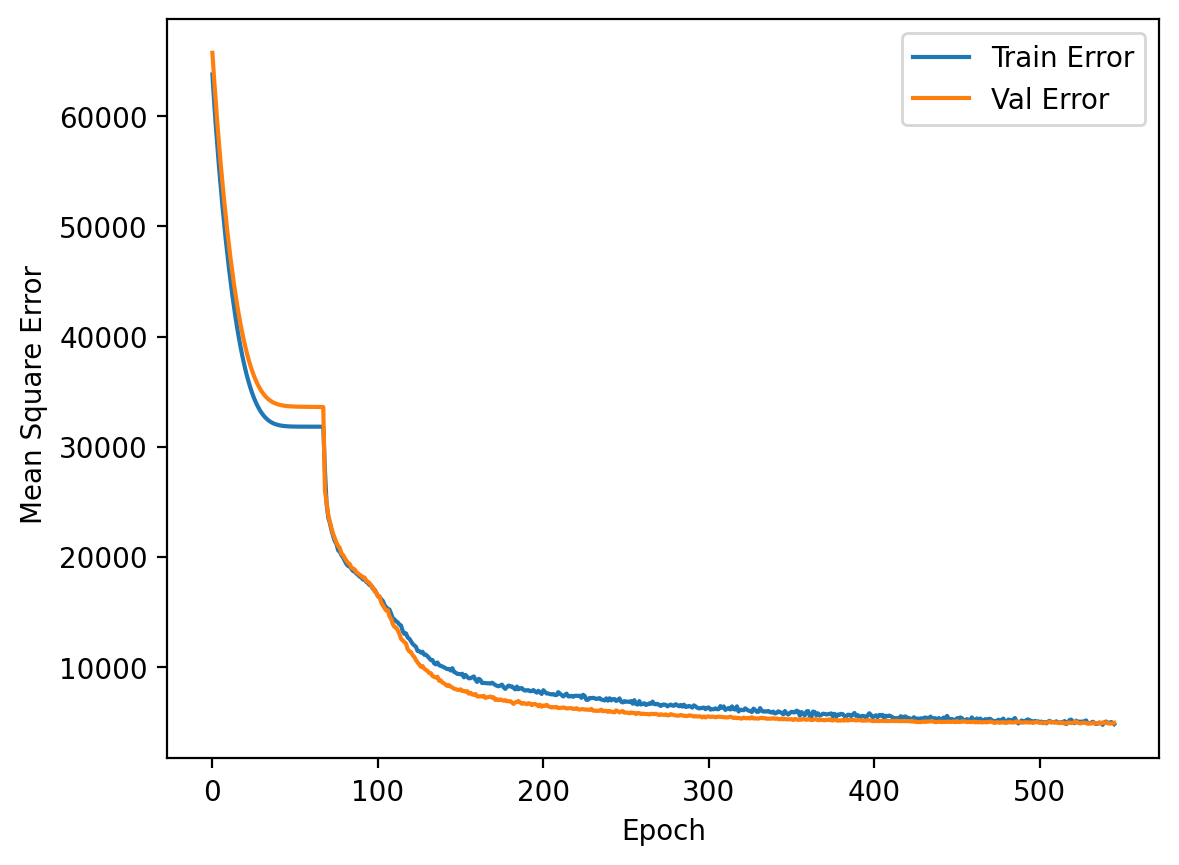

In [ ]:
# plot history
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['index'], hist['mse'], label='Train Error')
plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
plt.legend()

In [ ]:
# @title Default title text
# Make predictions
predictions = np.round(model.predict(X_test),1)

364/364 [==============================] - 1s 2ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

In [ ]:
# View the RMSE
result = mean_squared_error(y_test, predictions, squared=False)
result

76.04018556060352

In [ ]:
# View r2 score
r2 = r2_score(y_test,predictions)
r2

0.8270174835386799

## Model Attempt 3

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

this attempt will combine causal registered
and add the cyclical feature for date only

In [ ]:
bikes.head(3)

In [ ]:
bikes.describe()

In [ ]:
print(bikes.shape)
print(bikes.columns)

(16637, 12)
Index(['dteday', 'season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum',
       'windspeed', 'temp_c', 'feels_like_c', 'casual', 'registered'],
      dtype='object')


In [ ]:
bikes.describe(include='all')

In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["casual"].sort_values(ascending = False)

<ipython-input-153-9b3fdb5a477c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


casual          1.000000
registered      0.511319
temp_c          0.455669
feels_like_c    0.450084
hr              0.304632
season          0.128405
windspeed       0.093039
holiday         0.032580
weathersit     -0.149897
workingday     -0.307590
hum            -0.348801
Name: casual, dtype: float64

In [ ]:
columns = bikes.columns.tolist()
for column in columns:
  plt.figure(figsize=(10, 5))  # Set figure size
  plt.scatter(bikes[column], [0] * len(bikes), alpha=0.6, edgecolors="w", linewidth=0.5)  # Scatter plot
  plt.xlabel(column)
  plt.title(f'PLOT: {column}')
  plt.yticks([])  # Disable the y-axis
  plt.show()
  print()
  # we want to adjust the range on windspeed,hum

<ipython-input-156-c401a29075d6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bikes.corr(),annot=True,cmap=colormap)


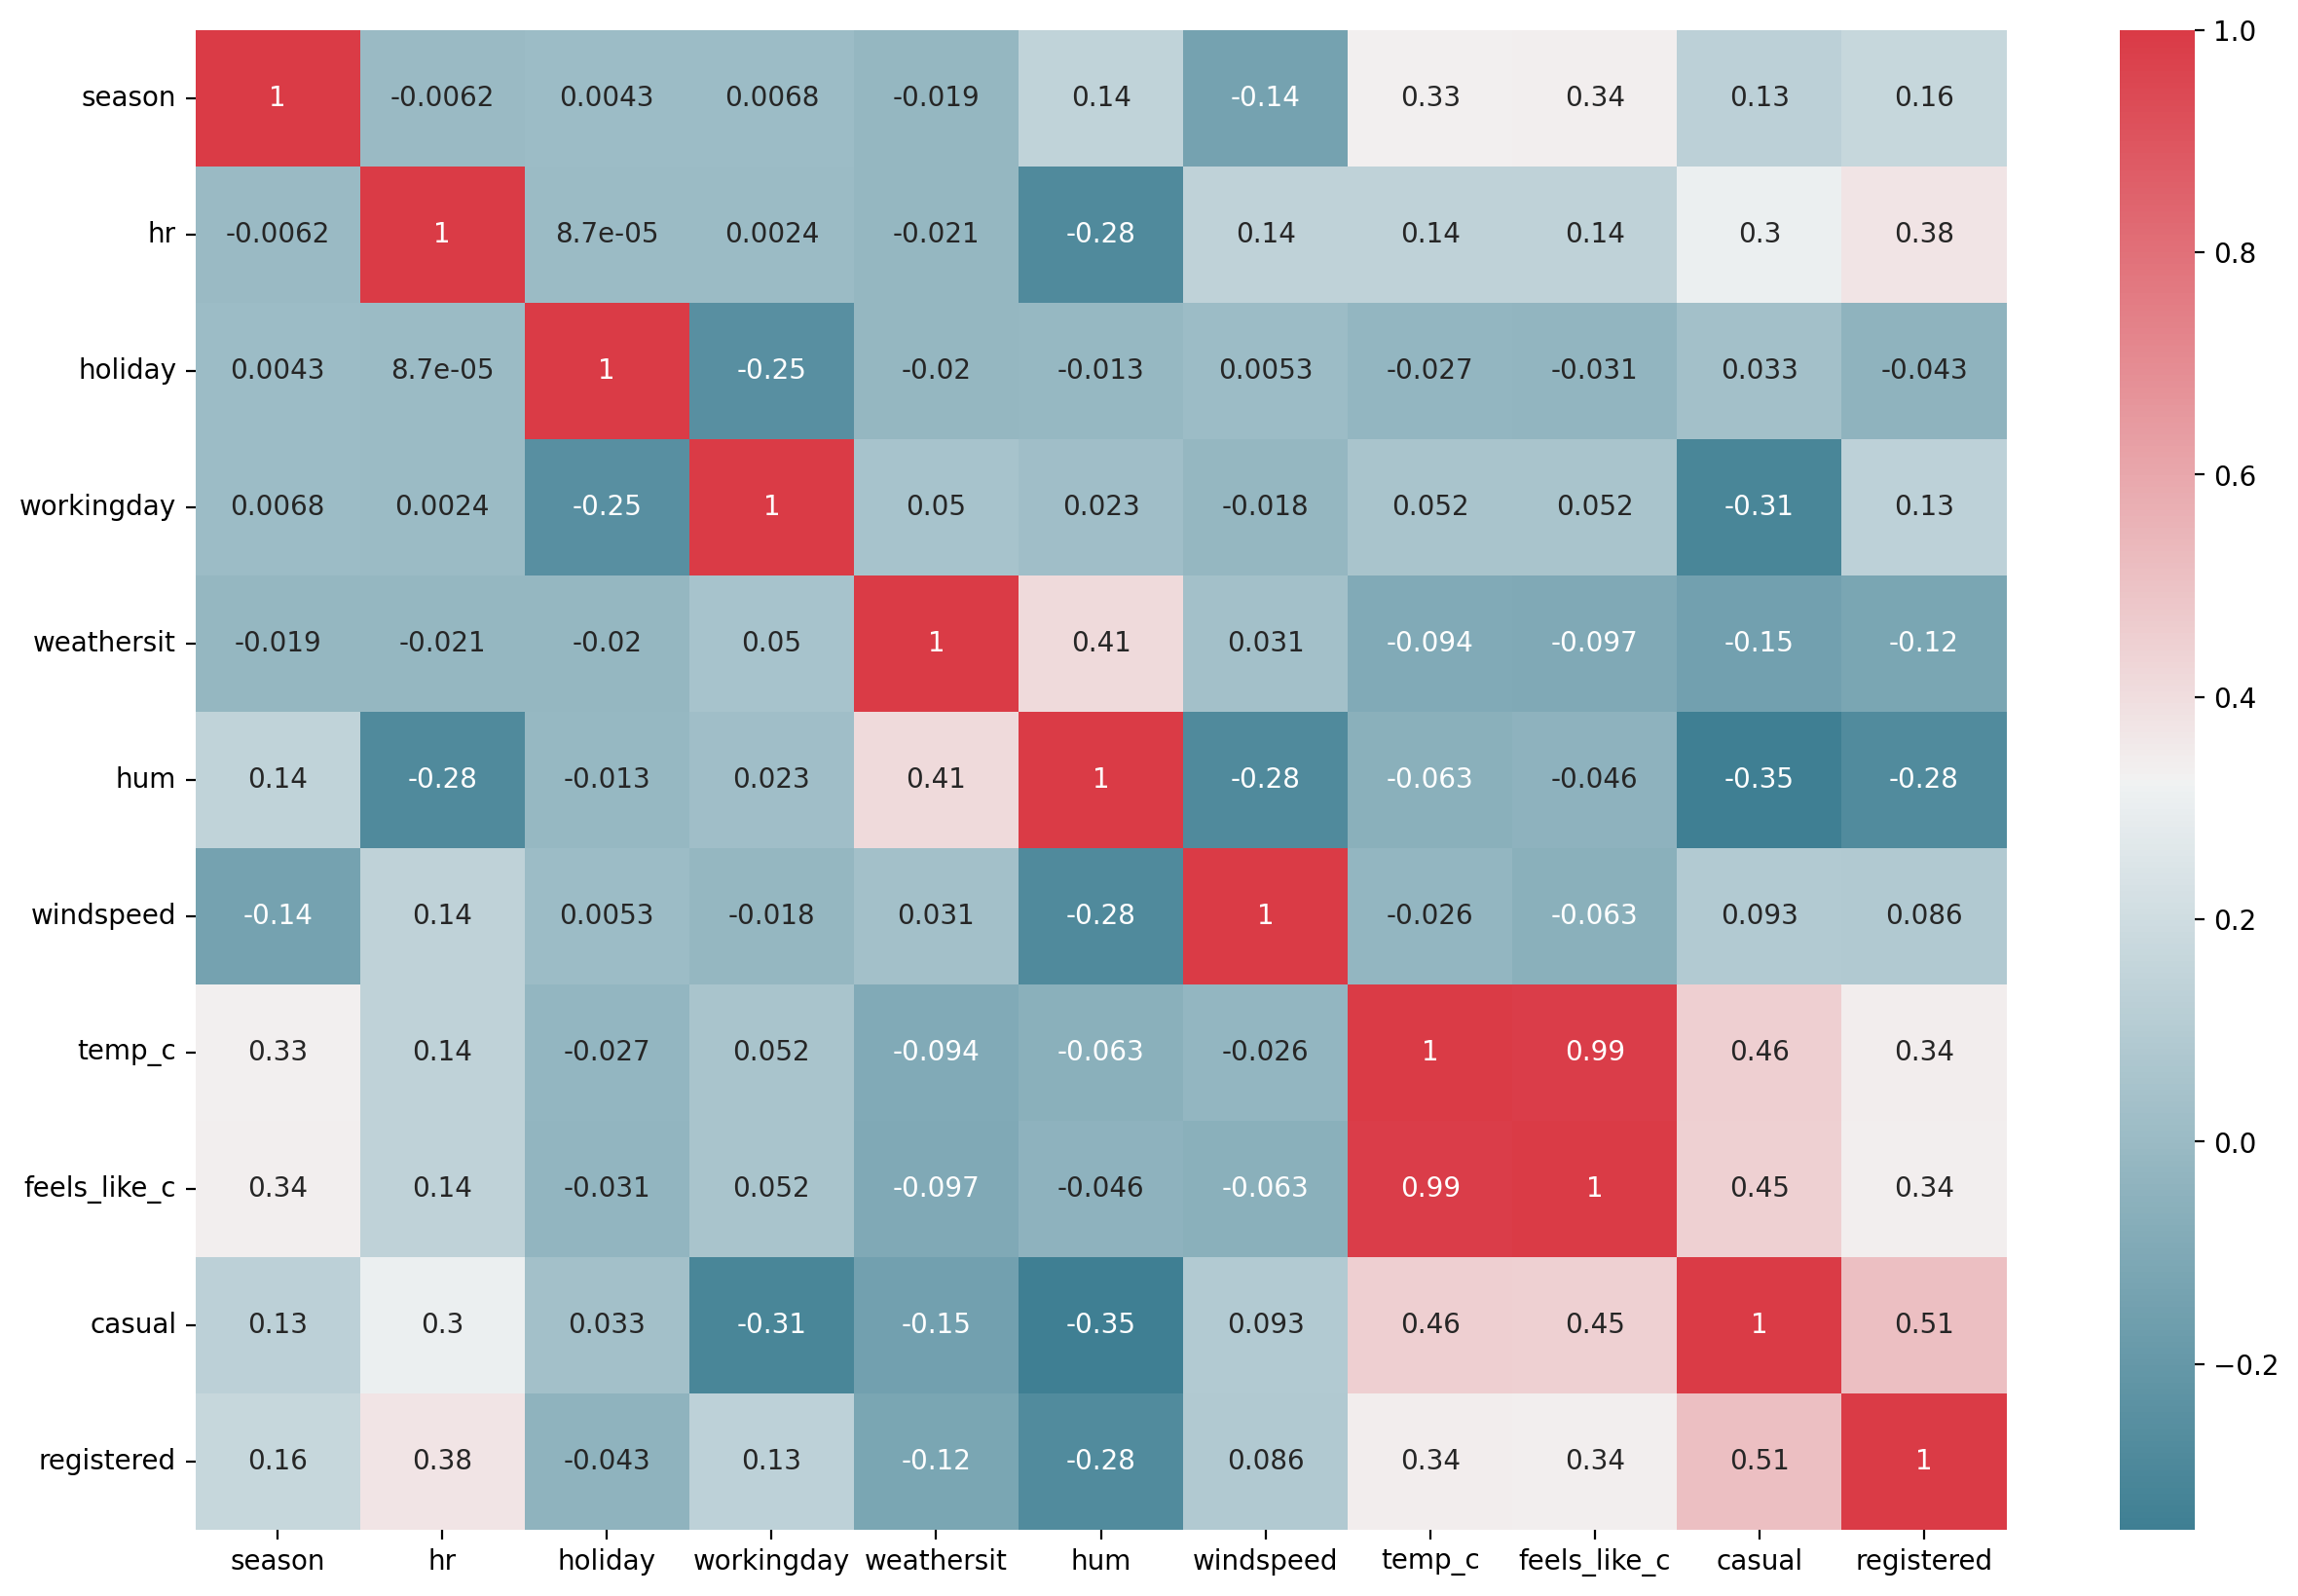

In [ ]:
import seaborn as sns #for plotting graphs
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(bikes.corr(),annot=True,cmap=colormap)

correlation_heatmap(bikes)

The graph below displays the number of bike riders over the first 10 days (more or less) of the dataset. Although there are not exactly 24 entries for each day, it gives us a good idea of how many rentals the bikes are getting hourly. The data is quite complex, as it shows lower ridership during weekends and surges when people use bikes for commuting during weekdays. In addition, we can also observe the influence of temperature, humidity, and windspeed on the number of riders. With all these factors in mind, your model will aim to encapsulate all the essential information.

### Feature Engineering

All of these features repeat after a certain amount of time:<br>
Time features that repeat season, hr, and day of the week
convert to Cyclical Features<br>
For example the hour feature repeats after it goes to 23 and it starts at zero
season goes to 4 start at 1<br>
day of the week ends at 6 and starts at 0 <br>
use the encode method that take each of them and run them through the encode <br>and sin and cosin column instead of original column
cyclical represents the feature data. <br>
Features are interger and the way they are represented does not allow them to show that they are cyclical - for example looking at the data you cant tell that hour 23 is next to hour zero

Date: extract the week number
Extracting the week number from the date. The date itself, in the format provided, isn’t something that can be processed in our algorithms. From this date, however, we can extract the week number (for that particular year) and use that variable as a predictor for the usage count. and get the day of the week.

In [ ]:
bikes['Datetime'] = pd.to_datetime(bikes['dteday'])
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,Datetime
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,2011-01-01
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,2011-01-01
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,2011-01-01
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,2011-01-01
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,2011-01-01


In [ ]:
import datetime
# https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe
#dates = pd.date_range(start='1/1/11', end='2012-12-31')
bikes['day_of_week'] = pd.to_datetime(bikes['dteday']).apply(lambda x: x.weekday())
bikes.head(3)
# get week number from date

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,Datetime,day_of_week
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,2011-01-01,5
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,2011-01-01,5
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,2011-01-01,5


In [ ]:
import datetime
bikes['month'] = bikes['Datetime'].dt.month
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,Datetime,day_of_week,month
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,2011-01-01,5,1
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,2011-01-01,5,1
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,2011-01-01,5,1
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,2011-01-01,5,1
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,2011-01-01,5,1


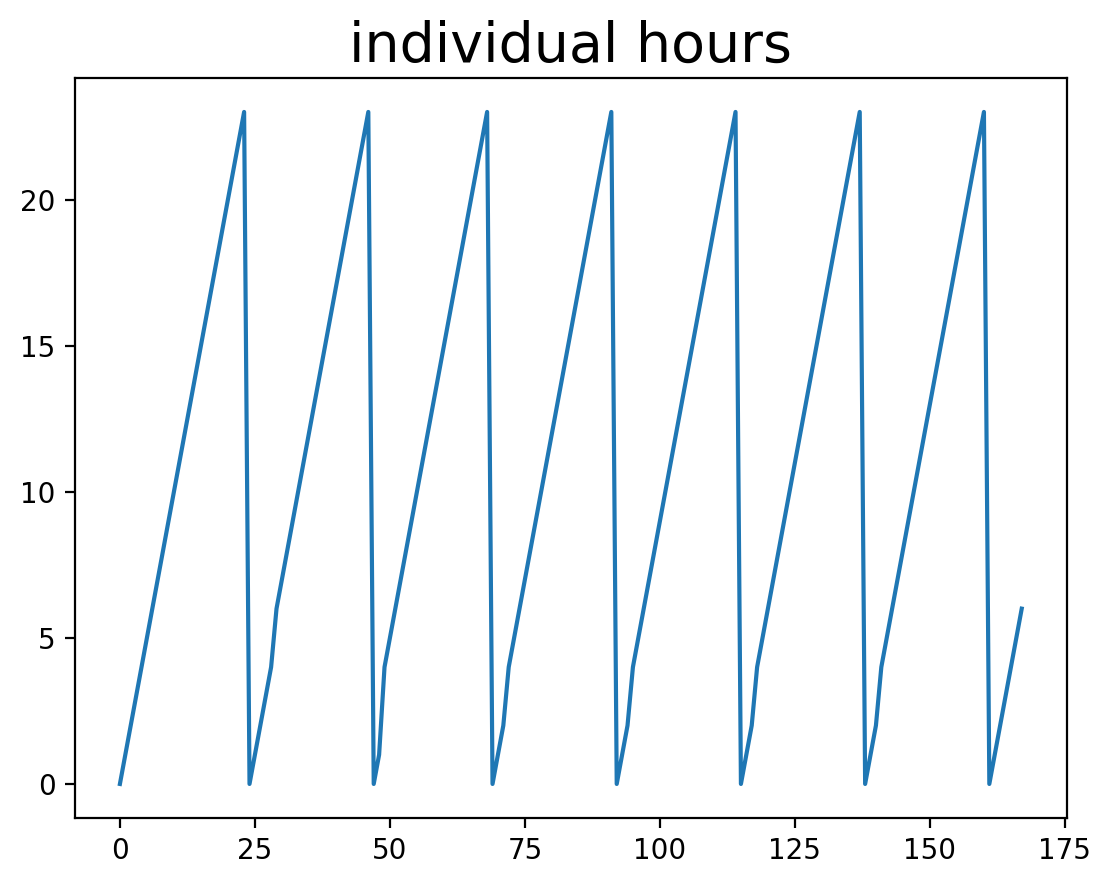

In [ ]:
# test sample
#https://www.kaggle.com/code/scratchpad/notebooka41198a413/edit
last_week = bikes.iloc[:168]

plt.title('individual hours', size =20)
plt.plot(range(len(last_week)), last_week['hr'])

In [ ]:
last_week[22:27]

In [ ]:
bikes['hour_sin'] = np.sin(2*np.pi * bikes['hr']/24.0)
bikes['hour_cos'] = np.cos(2* np.pi * bikes['hr']/24.0)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,Datetime,day_of_week,month,hour_sin,hour_cos
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,2011-01-01,5,1,0.000000,1.000000
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,2011-01-01,5,1,0.258819,0.965926
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,2011-01-01,5,1,0.500000,0.866025
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,2011-01-01,5,1,0.707107,0.707107
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,2011-01-01,5,1,0.866025,0.500000


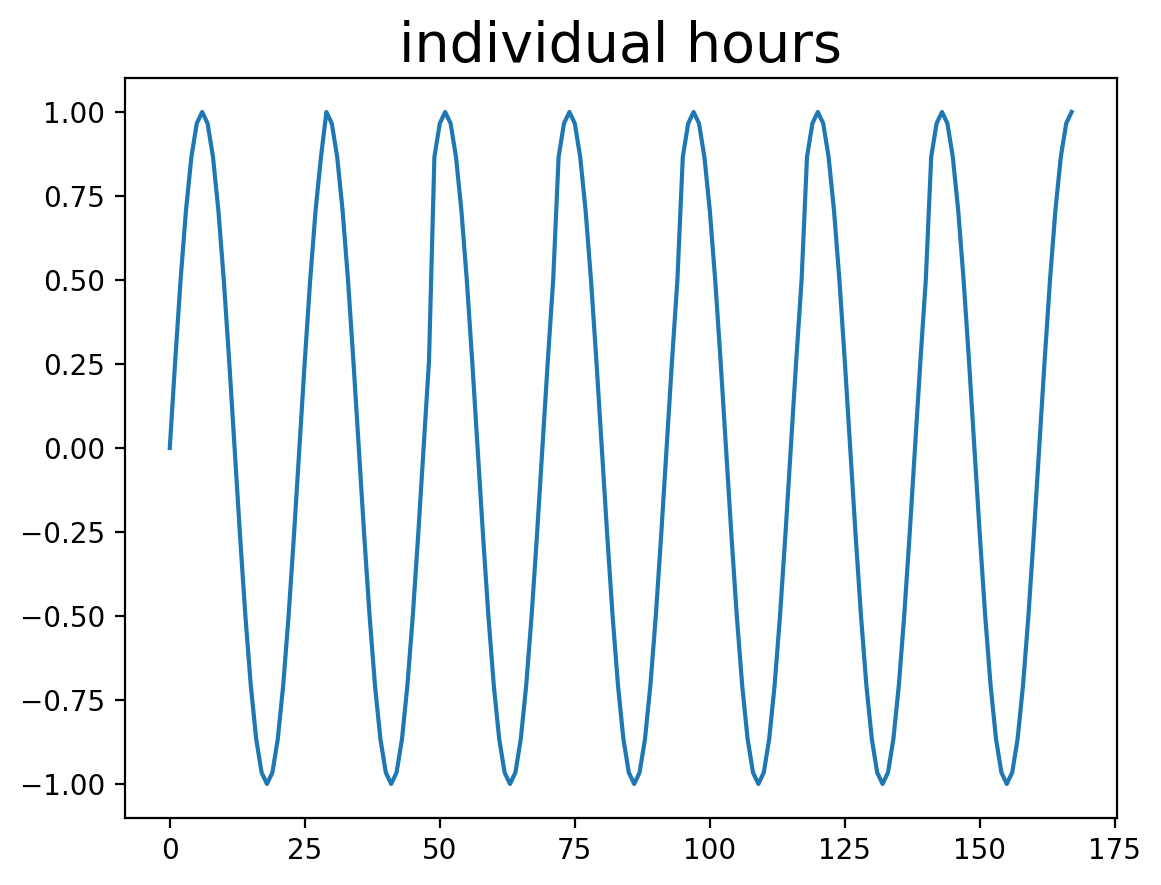

In [ ]:
last_week = bikes.iloc[0:168]
plt.title('individual hours', size =20)
plt.plot(range(len(last_week)), last_week['hour_sin'])

In [ ]:
last_week[22:27]

It's great to see that the absolute difference in hour_sin before, at, and after midnight is now the same. However, we need to address the issue with the hour_sin plot, where two records have the exact same hour_sin values. A possible solution to this is to use the cosine transformation to separate these records from each other. By plotting both features (hour_sin and cosine) together in two dimensions, we get a perfect cycle, which is an optimal way to present cyclical data to deep learning algorithms. This approach will ensure that the cyclical data is effectively encoded as a cycle, and our deep learning algorithm will be able to learn from it accurately.

In [ ]:
ax=last_week.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

combined the count of causal and registered to have a total number of bike rentals.

In [ ]:
bikes['count']= bikes['casual'] + bikes['registered']

<Axes: xlabel='dteday'>

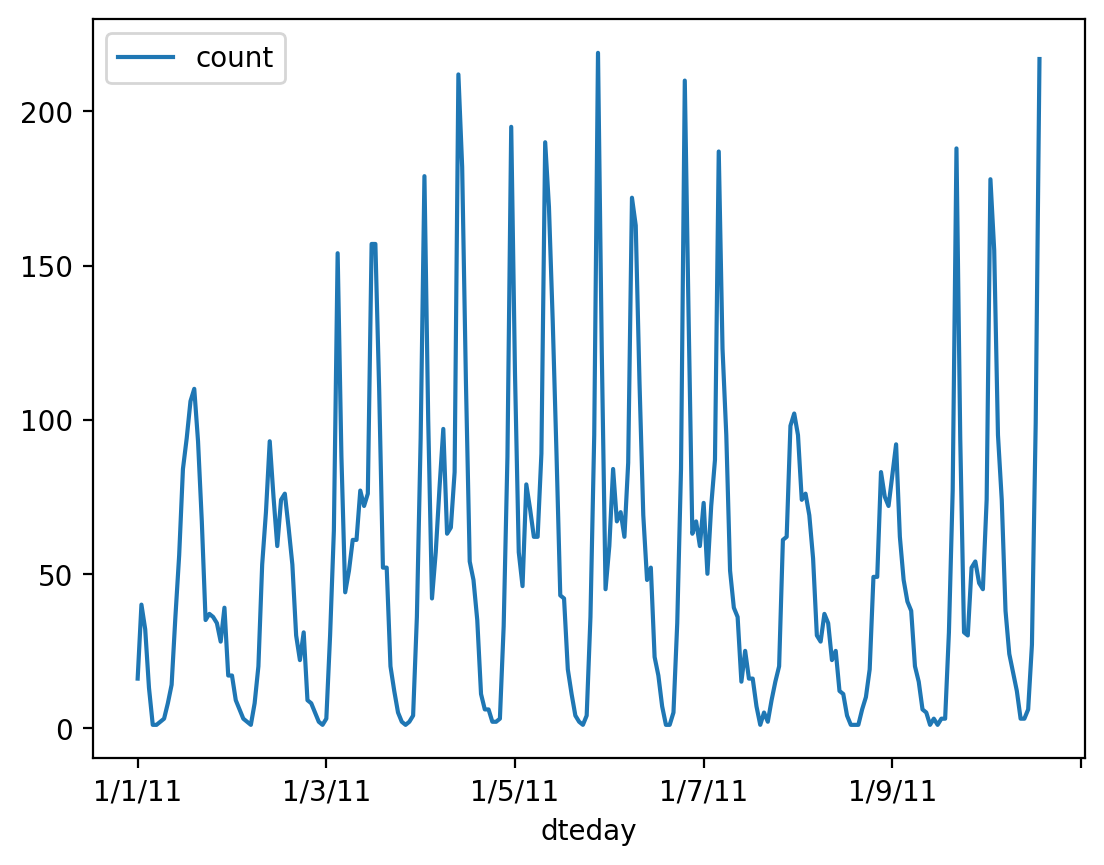

In [ ]:
bikes[:24*10].plot(x='dteday', y='count')

so by seeing the result we can conclude cnt - ranges between min of 1 and max of 977 which means that each hour has seen a minimum of 1 bike rental to max of 977 bike rentals that good right and

avg rental count - 189.5 as we are dealing with continuous numerical variables where linear regression is the right choice to train and predict bicycle rental count. but you are free to apply any regression model to predict feel free to explore
https://www.kaggle.com/code/abdul002/bike-sharing-rental-prediction

In [ ]:
bikes['count'].describe()

count    16637.000000
mean       190.477009
std        182.026755
min          1.000000
25%         41.000000
50%        143.000000
75%        282.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["count"].sort_values(ascending = False)

<ipython-input-166-87af43921c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


count           1.000000
registered      0.971744
casual          0.699721
temp_c          0.409245
feels_like_c    0.404820
hr              0.396945
season          0.170228
month           0.140023
windspeed       0.097011
workingday      0.024935
day_of_week    -0.002969
holiday        -0.026586
weathersit     -0.140111
hum            -0.327288
hour_cos       -0.406042
hour_sin       -0.413605
Name: count, dtype: float64

In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["month"].sort_values(ascending = False)

In [ ]:
dummy_fields = ['season', 'weathersit']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        16637 non-null  int64  
 1   holiday       16637 non-null  int64  
 2   workingday    16637 non-null  int64  
 3   weathersit    16637 non-null  int64  
 4   hum           16637 non-null  float64
 5   windspeed     16637 non-null  int64  
 6   temp_c        16637 non-null  float64
 7   feels_like_c  16637 non-null  float64
 8   month         16637 non-null  int64  
 9   hour_sin      16637 non-null  float64
 10  hour_cos      16637 non-null  float64
 11  day_of_week   16637 non-null  int64  
 12  season_1      16637 non-null  uint8  
 13  season_2      16637 non-null  uint8  
 14  season_3      16637 non-null  uint8  
 15  season_4      16637 non-null  uint8  
 16  weathersit_1  16637 non-null  uint8  
 17  weathersit_2  16637 non-null  uint8  
 18  weathersit_3  16637 non-nu

###Hot Encoding

In [ ]:
# dummy variables
dummy_fields = ['season', 'weathersit', 'workingday']
for each in dummy_fields:
    dummies = pd.get_dummies(bikes[each], prefix=each, drop_first=False)
    bikes = pd.concat([bikes, dummies], axis=1)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,...,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,workingday_0,workingday_1
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,...,1,0,0,0,1,0,0,0,1,0
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,...,1,0,0,0,1,0,0,0,1,0
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,...,1,0,0,0,1,0,0,0,1,0
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,...,1,0,0,0,1,0,0,0,1,0
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dteday        16637 non-null  object        
 1   season        16637 non-null  int64         
 2   hr            16637 non-null  int64         
 3   holiday       16637 non-null  int64         
 4   workingday    16637 non-null  int64         
 5   weathersit    16637 non-null  int64         
 6   hum           16637 non-null  float64       
 7   windspeed     16637 non-null  int64         
 8   temp_c        16637 non-null  float64       
 9   feels_like_c  16637 non-null  float64       
 10  casual        16637 non-null  int64         
 11  registered    16637 non-null  int64         
 12  Datetime      16637 non-null  datetime64[ns]
 13  day_of_week   16637 non-null  int64         
 14  month         16637 non-null  int64         
 15  hour_sin      16637 non-null  float6

In [ ]:
# Brother Flores Study Session
# drop registered and casual
X = bikes.drop(columns=['registered','casual','count','dteday','Datetime'])
y = bikes['count']

In [ ]:
# Get our target variable and features and split them into test and train datasets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# fit scaler on training data
#MinMax scales data between 0 and 1
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)
X_train


array([[0.66666667, 0.13043478, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.60869565, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.56521739, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.34782609, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.86956522, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.52173913, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        16637 non-null  int64  
 1   hr            16637 non-null  int64  
 2   holiday       16637 non-null  int64  
 3   workingday    16637 non-null  int64  
 4   weathersit    16637 non-null  int64  
 5   hum           16637 non-null  float64
 6   windspeed     16637 non-null  int64  
 7   temp_c        16637 non-null  float64
 8   feels_like_c  16637 non-null  float64
 9   day_of_week   16637 non-null  int64  
 10  month         16637 non-null  int64  
 11  hour_sin      16637 non-null  float64
 12  hour_cos      16637 non-null  float64
 13  season_1      16637 non-null  uint8  
 14  season_2      16637 non-null  uint8  
 15  season_3      16637 non-null  uint8  
 16  season_4      16637 non-null  uint8  
 17  weathersit_1  16637 non-null  uint8  
 18  weathersit_2  16637 non-nu

In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# hidden layer has a dropout technique applied to prevent overfitting. When the Dropout() is applied, randomly selected neurons are ignored during training. The probability of droping nuerons is the parameter.
# Dropout info: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# a single node output layer
"""
Output Layer:
regression - single neuron
binary classification - single neuron
multi-class classification - Multiple neurons, one for each class."""

model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(1, activation='relu'))

In [ ]:
# Display model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               3072      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 52609 (205.50 KB)
Trainable params: 52609 (205.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the NN model
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. The following example uses MSE.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [ ]:
# Configuration provided to the model to stop training if certain metric doesn't improve after a certain number of epochs.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
# Train the model with training data
# epoch - Indicates the number of passes of the entire training dataset.
# validation_split - spliting the training data for validation
# batch_size - the size of each batch used to train the NN
# callbacks - the configuration to stop training if certain metrics don't improve.
# shuffle - whether to shuffle the data before each epoch
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# See how the NN improves with each pass
hist = pd.DataFrame(history.history)

Epoch 1/2000
163/163 [==============================] - 2s 5ms/step - loss: 63537.2344 - mse: 63537.2344 - val_loss: 65424.6094 - val_mse: 65424.6133
Epoch 2/2000
163/163 [==============================] - 1s 4ms/step - loss: 61115.2500 - mse: 61115.2500 - val_loss: 63113.2734 - val_mse: 63113.2734
Epoch 3/2000
163/163 [==============================] - 1s 4ms/step - loss: 58875.8750 - mse: 58875.8750 - val_loss: 60852.1758 - val_mse: 60852.1758
Epoch 4/2000
163/163 [==============================] - 1s 4ms/step - loss: 56754.6641 - mse: 56754.6641 - val_loss: 58772.8281 - val_mse: 58772.8242
Epoch 5/2000
163/163 [==============================] - 1s 4ms/step - loss: 54796.1445 - mse: 54796.1445 - val_loss: 56810.0781 - val_mse: 56810.0781
Epoch 6/2000
163/163 [==============================] - 1s 4ms/step - loss: 52868.4258 - mse: 52868.4258 - val_loss: 54859.0234 - val_mse: 54859.0234
Epoch 7/2000
163/163 [==============================] - 1s 4ms/step - loss: 51069.1641 - mse: 51069.

In [ ]:
# View history in a df
hist.head()
#

,loss,mse,val_loss,val_mse
0,63537.234375,63537.234375,65424.609375,65424.613281
1,61115.250000,61115.250000,63113.273438,63113.273438
2,58875.875000,58875.875000,60852.175781,60852.175781
3,56754.664062,56754.664062,58772.828125,58772.824219
4,54796.144531,54796.144531,56810.078125,56810.078125


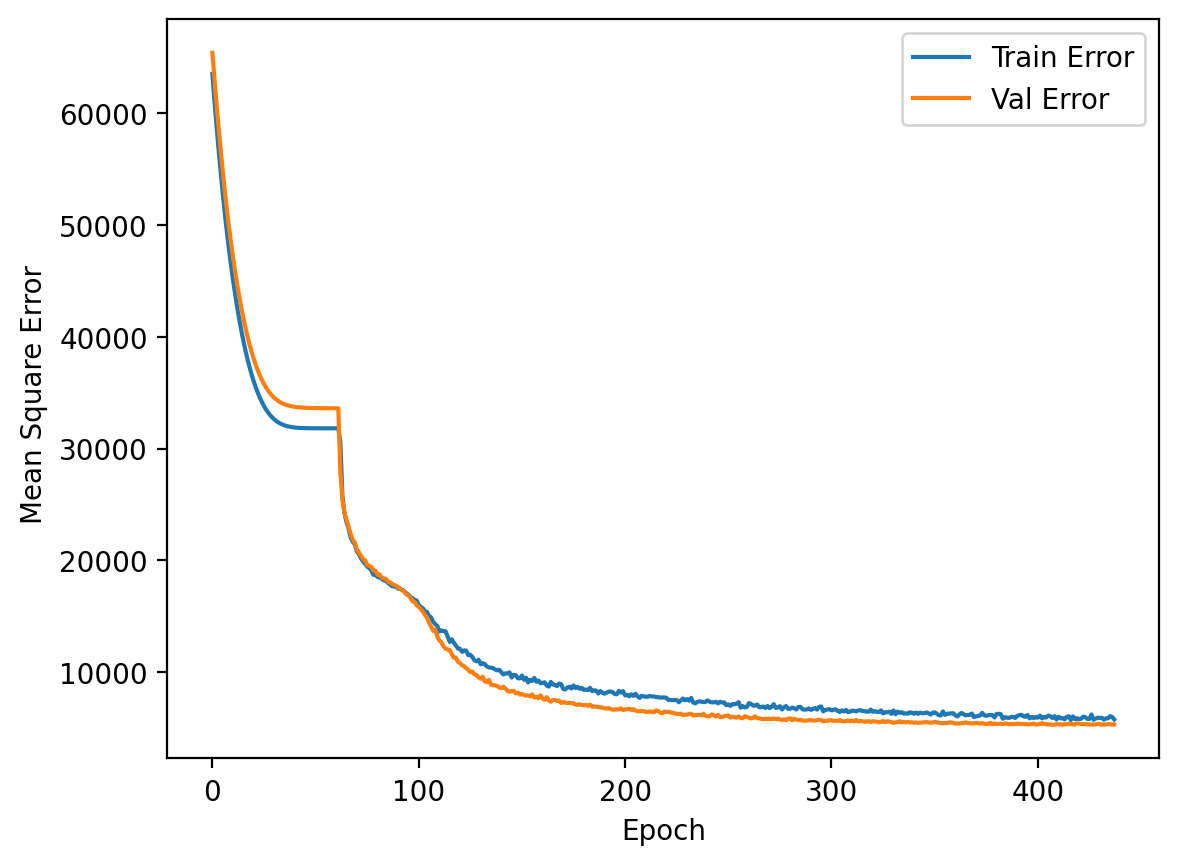

In [ ]:
# plot history
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['index'], hist['mse'], label='Train Error')
plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
plt.legend()

In [ ]:
# @title Default title text
# Make predictions
predictions = np.round(model.predict(X_test),1)

364/364 [==============================] - 1s 2ms/step


In [ ]:
# View the RMSE
result = mean_squared_error(y_test, predictions, squared=False)
result

77.96069155463866

In [ ]:
# View r2 score
r2 = r2_score(y_test,predictions)
r2

0.8181692875030124

# Spencer

## Model Attempt 1


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Turn dates into hours since 2010
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
start_date = pd.to_datetime('2010-12-30')
bikes['dteday'] = (bikes['dteday'] - start_date) / pd.Timedelta(hours=1)

# Turn float64 into float32 (tensor likes it better?)
bikes['dteday'] = bikes['dteday'].astype('float32')
bikes['hum'] = bikes['hum'].astype('float32')
bikes['temp_c'] = bikes['temp_c'].astype('float32')
bikes['feels_like_c'] = bikes['feels_like_c'].astype('float32')

print(bikes.head())

X = bikes.drop(columns=['registered'])
y = bikes['registered']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normailze continous data
normalizer = MinMaxScaler().fit(X_train)

# transform training data
X_train = normalizer.transform(X_train)

# transform testing data
X_test = normalizer.transform(X_test)

# Create the model
model = keras.Sequential([
    # Input layer
    layers.Dense(128, input_dim=len(X_train[0]), activation='relu'),
    # Hidden Layers
    layers.Dense(units=256, activation='relu'),
    # Dropout layer to reduce overfitting
    layers.Dropout(0.5),
    # Output layer
    layers.Dense(1)
])
model.summary()

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Add early stopping to help prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

# Train the model
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)



   dteday  season  hr  holiday  workingday  weathersit   hum  windspeed  \
0    48.0       1   0        0           0           1  0.81          0   
1    48.0       1   1        0           0           1  0.80          0   
2    48.0       1   2        0           0           1  0.80          0   
3    48.0       1   3        0           0           1  0.75          0   
4    48.0       1   4        0           0           1  0.75          0   

   temp_c  feels_like_c  casual  registered  
0    3.28        3.0014       3          13  
1    2.34        1.9982       8          32  
2    2.34        1.9982       5          27  
3    3.28        3.0014       3          10  
4    3.28        3.0014       0           1  
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                       

In [ ]:
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

mini_normalized = normalizer.transform(mini)

y_pred = model.predict(mini_normazlized)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

## Model Attempt 2

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Turn dates into hours since 2010
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
start_date = pd.to_datetime('2010-12-30')
bikes['dteday'] = (bikes['dteday'] - start_date) / pd.Timedelta(hours=1)

# Turn float64 into float32 (tensor likes it better?)
bikes['dteday'] = bikes['dteday'].astype('float32')
bikes['hum'] = bikes['hum'].astype('float32')
bikes['temp_c'] = bikes['temp_c'].astype('float32')
bikes['feels_like_c'] = bikes['feels_like_c'].astype('float32')

print(bikes.head())

X = bikes.drop(columns=['registered', 'casual'])
y = bikes['registered'] + bikes['casual']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normailze continous data
normalizer = MinMaxScaler().fit(X_train)

# transform training data
X_train = normalizer.transform(X_train)

# transform testing data
X_test = normalizer.transform(X_test)

# Create the model
model = keras.Sequential([
    # Input layer
    layers.Dense(10, input_dim=len(X_train[0]), activation='relu'), # changed number of layer from 128 to 10
    # Hidden Layers
    layers.Dense(units=128, activation='relu'),                     # changed number of layer from 256 to 128
    # Dropout layer to reduce overfitting
    layers.Dropout(0.5),
    # Output layer
    layers.Dense(1)
])
model.summary()

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Add early stopping to help prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

# Train the model
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

   dteday  season  hr  holiday  workingday  weathersit   hum  windspeed  \
0    48.0       1   0        0           0           1  0.81          0   
1    48.0       1   1        0           0           1  0.80          0   
2    48.0       1   2        0           0           1  0.80          0   
3    48.0       1   3        0           0           1  0.75          0   
4    48.0       1   4        0           0           1  0.75          0   

   temp_c  feels_like_c  casual  registered  
0    3.28        3.0014       3          13  
1    2.34        1.9982       8          32  
2    2.34        1.9982       5          27  
3    3.28        3.0014       3          10  
4    3.28        3.0014       0           1  
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                       

In [ ]:
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

# Turn dates into hours since 2010
mini['dteday'] = pd.to_datetime(mini['dteday'])
start_date = pd.to_datetime('2010-12-30')
mini['dteday'] = (mini['dteday'] - start_date) / pd.Timedelta(hours=1)

# Turn float64 into float32 (tensor likes it better?)
mini['dteday'] = mini['dteday'].astype('float32')
mini['hum'] = mini['hum'].astype('float32')
mini['temp_c'] = mini['temp_c'].astype('float32')
mini['feels_like_c'] = mini['feels_like_c'].astype('float32')

mini_normalized = normalizer.transform(mini)

y_pred = model.predict(mini_normalized)

y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('test.csv', index=False)

2/2 [==============================] - 0s 5ms/step


In [ ]:
december_set = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

# Turn dates into hours since 2010
december_set['dteday'] = pd.to_datetime(december_set['dteday'])
start_date = pd.to_datetime('2010-12-30')
december_set['dteday'] = (december_set['dteday'] - start_date) / pd.Timedelta(hours=1)

# Turn float64 into float32 (tensor likes it better?)
december_set['dteday'] = december_set['dteday'].astype('float32')
december_set['hum'] = december_set['hum'].astype('float32')
december_set['temp_c'] = december_set['temp_c'].astype('float32')
december_set['feels_like_c'] = december_set['feels_like_c'].astype('float32')

december_set_normalized = normalizer.transform(december_set)

y_pred = model.predict(december_set_normalized)

y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('full_holdout.csv', index=False)

24/24 [==============================] - 0s 2ms/step


In [ ]:
#Creating the train and val error plot for spencers second model
hist = pd.DataFrame(history.history)
hist.head()
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.plot(hist['index'], hist['mse'], label='train error')
plt.plot(hist['index'], hist['val_mse'], label = 'val error')
plt.legend()

# Calvin

## Model Attempt

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

def addHoursSince2011(row):
  dateStr = row['dteday']
  hour = row['hr']
  # datestr is in format M/D/YY
  reference_date = datetime(2011, 1, 1, 0)

  current_date = datetime(2000 + int(dateStr.split('/')[2]), int(dateStr.split('/')[0]), int(dateStr.split('/')[1]), hour)

  # Calculate the time difference
  time_difference = current_date - reference_date

  # Extract the total hours from the time difference
  hours = time_difference.total_seconds() / 3600
  return hours

def addDaysToHoliday(row):
  nearestHolidayDate = nearest_holiday(row.date)
  day_diff = abs((nearestHolidayDate - row.date).days)
  return day_diff

def nearest_holiday(target_date):
  holidays = [
      datetime(2023, 1, 1),   # New Year's Day
      datetime(2023, 12, 25),  # Christmas Day
      datetime(2023, 11, 23),  # Thanksgiving
      datetime(2023, 7, 4),   # Independence Day
      datetime(2023, 5, 29),  # Memorial Day
      datetime(2023, 2, 14),  # Valentine's Day
  ]
  nearest_holiday = min(holidays, key=lambda holiday: abs((target_date - holiday).days))

  return nearest_holiday

def normalizeDF(df):
  # add date
  df['date'] = pd.to_datetime(df['dteday'])

  # add hours since Jan 1 2011
  df['hours_since_2011'] = df.apply(addHoursSince2011, axis=1)

  # add the y
  df['y'] = bikes['casual'] + bikes['registered']

  # add days until holiday
  df['days_to_holiday'] = df.apply(addDaysToHoliday, axis=1)

  return df
bikes = normalizeDF(bikes)

features = ['season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum', 'windspeed', 'temp_c', 'feels_like_c', 'hours_since_2011', 'days_to_holiday']
target = 'y'

X = bikes[features]
y = bikes[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model():
	# create model
	return tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),\
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

model = create_model();

model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/2000
333/333 [==============================] - 3s 6ms/step - loss: 30240.1445 - val_loss: 20054.3770
Epoch 2/2000
333/333 [==============================] - 2s 5ms/step - loss: 20068.4395 - val_loss: 19081.0234
Epoch 3/2000
333/333 [==============================] - 1s 4ms/step - loss: 18431.8281 - val_loss: 17090.1211
Epoch 4/2000
333/333 [==============================] - 1s 4ms/step - loss: 15556.3457 - val_loss: 13941.9053
Epoch 5/2000
333/333 [==============================] - 1s 4ms/step - loss: 13160.4092 - val_loss: 12507.6396
Epoch 6/2000
333/333 [==============================] - 1s 4ms/step - loss: 11943.6338 - val_loss: 11452.0996
Epoch 7/2000
333/333 [==============================] - 1s 4ms/step - loss: 11136.9258 - val_loss: 10694.7256
Epoch 8/2000
333/333 [==============================] - 1s 4ms/step - loss: 10306.8809 - val_loss: 9969.3115
Epoch 9/2000
333/333 [==============================] - 1s 4ms/step - loss: 9584.4688 - val_loss: 9451.3076
Epoch 10/2000

## Model Metrics

104/104 [==============================] - 0s 2ms/step
Mean Squared Error on the test set: 2075.39300478773
R-squared (R^2) on the test set: 0.9347066235865696
Root Mean Squared Error (RMSE) on the test set: 45.55648147945285
Index(['loss', 'val_loss'], dtype='object')


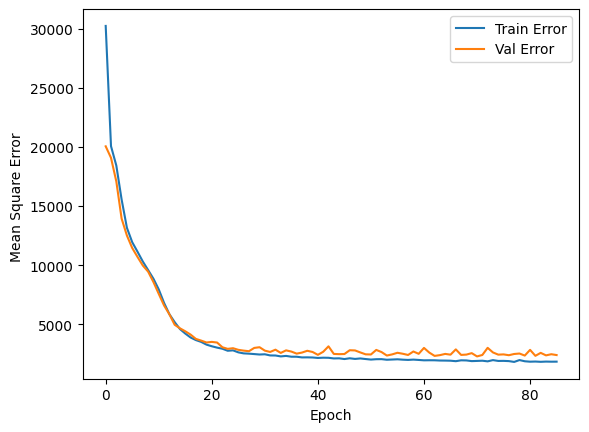

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R^2) on the test set: {r2}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse}')

hist = pd.DataFrame(history.history)
print(hist.keys())
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['index'], hist['loss'], label='Train Error')
plt.plot(hist['index'], hist['val_loss'], label = 'Val Error')
plt.legend()


## Model Predictions

In [ ]:
# Predict on mini
import csv
#Get the holdout data
holdout_mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
holdout_mini = normalizeDF(holdout_mini)

# Predict for holdout mini
features = ['season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum', 'windspeed', 'temp_c', 'feels_like_c', 'hours_since_2011', 'days_to_holiday']

X = holdout_mini[features]
X_new = scaler.transform(X)

predictions = model.predict(X_new)

with open('team5-module2-predictions.csv', 'w') as f:

    csv_writer = csv.writer(f)
    csv_writer.writerow(['predictions'])
    for prediction in predictions:
      csv_writer.writerow([prediction][0])


print(predictions)

2/2 [==============================] - 0s 5ms/step
[[121.54342 ]
 [101.0137  ]
 [ 69.84034 ]
 [ 39.544914]
 [ 12.161437]
 [ 13.62555 ]
 [ 19.702185]
 [ 28.618113]
 [ 64.82011 ]
 [124.54049 ]
 [187.13913 ]
 [308.12564 ]
 [343.86765 ]
 [333.72708 ]
 [341.42978 ]
 [381.2963  ]
 [325.70572 ]
 [245.42812 ]
 [192.2201  ]
 [140.44864 ]
 [139.67758 ]
 [ 92.7849  ]
 [ 78.06039 ]
 [ 71.42924 ]
 [105.92004 ]
 [ 92.574936]
 [ 71.231514]
 [ 45.064262]
 [ 15.005853]
 [ 12.051908]
 [ 12.25748 ]
 [ 26.879324]
 [ 69.43731 ]
 [136.39389 ]
 [240.77199 ]]


## DQA

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

### Miss%



In [ ]:
columnMissAttribute = dict((x, None) for x in bikes.columns)
print(columnMissAttribute)

for colName in df.columns:
  print(f"============= {colName} =============")
  print("Unique", df[colName].unique())
  print(len(df[df[colName] == columnMissAttribute[colName]]), " / ", len(df[colName]))
  print("Miss%: ", len(df[df[colName] == columnMissAttribute[colName]])/ len(df[colName]))

{'dteday': None, 'season': None, 'hr': None, 'holiday': None, 'workingday': None, 'weathersit': None, 'hum': None, 'windspeed': None, 'temp_c': None, 'feels_like_c': None, 'casual': None, 'registered': None}
============= dteday =============
Unique ['1/1/11' '1/2/11' '1/3/11' '1/4/11' '1/5/11' '1/6/11' '1/7/11' '1/8/11'
 '1/9/11' '1/10/11' '1/11/11' '1/12/11' '1/13/11' '1/14/11' '1/15/11'
 '1/16/11' '1/17/11' '1/18/11' '1/19/11' '1/20/11' '1/21/11' '1/22/11'
 '1/23/11' '1/24/11' '1/25/11' '1/26/11' '1/27/11' '1/28/11' '1/29/11'
 '1/30/11' '1/31/11' '2/1/11' '2/2/11' '2/3/11' '2/4/11' '2/5/11' '2/6/11'
 '2/7/11' '2/8/11' '2/9/11' '2/10/11' '2/11/11' '2/12/11' '2/13/11'
 '2/14/11' '2/15/11' '2/16/11' '2/17/11' '2/18/11' '2/19/11' '2/20/11'
 '2/21/11' '2/22/11' '2/23/11' '2/24/11' '2/25/11' '2/26/11' '2/27/11'
 '2/28/11' '3/1/11' '3/2/11' '3/3/11' '3/4/11' '3/5/11' '3/6/11' '3/7/11'
 '3/8/11' '3/9/11' '3/10/11' '3/11/11' '3/12/11' '3/13/11' '3/14/11'
 '3/15/11' '3/16/11' '3/17/11' '3/18/

### Outliars

In [ ]:
df.describe(include='all')

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
count,16637,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
unique,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/1/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,36.471239,154.005770
std,NaN,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,49.995203,151.319818
min,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000
25%,NaN,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,4.000000,35.000000
50%,NaN,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,17.000000,116.000000
75%,NaN,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,50.000000,220.000000


In [ ]:
# Prints interquartiles and if a feature has outliars
detect_outliars = df.drop(columns=['dteday'])

for col_name in detect_outliars.columns:
  print("******************** " + col_name + " ********************")
  iqr25, iqr50, iqr75 = np.percentile(detect_outliars[col_name], [25, 50, 75]);
  print("iqr25: " + str(iqr25) + " iqr50: " + str(iqr50) + " iqr75: " + str(iqr75))
  max = detect_outliars[col_name].max()
  min = detect_outliars[col_name].min()
  print("Max: " + str(max) + " Min: " + str(min))
  lower_bound = iqr50 - ((iqr50 - iqr25) * 1.5)
  higher_bound = iqr50 + ((iqr75 - iqr50) * 1.5)
  print("Lower Bound: "+ str(lower_bound) + " Higher Bound: "+ str(higher_bound))
  print("Outliars: " + str(lower_bound > min or higher_bound < max))


******************** season ********************
iqr25: 2.0 iqr50: 2.0 iqr75: 3.0
Max: 4 Min: 1
Lower Bound: 2.0 Higher Bound: 3.5
Outliars: True
******************** hr ********************
iqr25: 6.0 iqr50: 12.0 iqr75: 18.0
Max: 23 Min: 0
Lower Bound: 3.0 Higher Bound: 21.0
Outliars: True
******************** holiday ********************
iqr25: 0.0 iqr50: 0.0 iqr75: 0.0
Max: 1 Min: 0
Lower Bound: 0.0 Higher Bound: 0.0
Outliars: True
******************** workingday ********************
iqr25: 0.0 iqr50: 1.0 iqr75: 1.0
Max: 1 Min: 0
Lower Bound: -0.5 Higher Bound: 1.0
Outliars: False
******************** weathersit ********************
iqr25: 1.0 iqr50: 1.0 iqr75: 2.0
Max: 4 Min: 1
Lower Bound: 1.0 Higher Bound: 2.5
Outliars: True
******************** hum ********************
iqr25: 0.47 iqr50: 0.62 iqr75: 0.78
Max: 1.0 Min: 0.0
Lower Bound: 0.39499999999999996 Higher Bound: 0.8600000000000001
Outliars: True
******************** windspeed ********************
iqr25: 7.0 iqr50: 13.0 iqr

# Hayden

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras


# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# rentals
data['total_rentals'] = data['casual'] + data['registered']
# day
data['dteday'] = pd.to_datetime(data['dteday'])
data['day_of_week'] = data['dteday'].dt.dayofweek
# month
data['month'] = data['dteday'].dt.month
# binary feature for weekends
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)
# temp/humidity feature
data['temp_hum_interaction'] = data['temp_c'] * data['hum']


# Define features (X) and target (y)
X = data[['season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum', 'windspeed', 'temp_c', 'feels_like_c',
          'day_of_week', 'month', 'is_weekend', 'temp_hum_interaction']]
y = data['total_rentals']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# build the nn model
model = Sequential()
model.add(Dense(9, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.01))

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'Root Mean Squared Error on Test Set: {rmse}')







Epoch 1/100
333/333 [==============================] - 2s 3ms/step - loss: 29973.5879 - val_loss: 21780.5645
Epoch 2/100
333/333 [==============================] - 1s 2ms/step - loss: 21461.2441 - val_loss: 21345.2656
Epoch 3/100
333/333 [==============================] - 1s 2ms/step - loss: 20873.5254 - val_loss: 20894.4336
Epoch 4/100
333/333 [==============================] - 1s 2ms/step - loss: 20509.6582 - val_loss: 20576.9277
Epoch 5/100
333/333 [==============================] - 1s 2ms/step - loss: 19848.1582 - val_loss: 18998.8496
Epoch 6/100
333/333 [==============================] - 1s 2ms/step - loss: 18165.3027 - val_loss: 18070.4922
Epoch 7/100
333/333 [==============================] - 1s 2ms/step - loss: 16866.9941 - val_loss: 16034.1895
Epoch 8/100
333/333 [==============================] - 1s 2ms/step - loss: 15583.6230 - val_loss: 14997.8906
Epoch 9/100
333/333 [==============================] - 1s 3ms/step - loss: 14418.0215 - val_loss: 14307.3076
Epoch 10/100
333/33